# Sleep Summary Statistics

In [1]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
plt.style.use('seaborn-colorblind')
sns.set_palette('Set1')
sns.set_style("white")
# plt.rcParams['image.cmap'] = 'Set1'

In [2]:
sleepDayFiles = glob.glob('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/*sleepDay*')

In [3]:
subject = '10011'
sleepLogInfoFile = glob.glob('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_%s_*sleepLogInfo*' % subject)
sleepLogInfoFile

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_sleepLogInfo_20190901_20201020.csv']

In [4]:
sleepSumStats = pd.DataFrame()
for file in sleepDayFiles:
    subject = os.path.basename(file).split('_sleepDay')[0][-5:]

    sleepDay = pd.read_csv(file)
    sleepDay['subject'] = subject
    
    sleepLogInfoFile = glob.glob('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_%s_*sleepLogInfo*' % subject)
    sleepLog = pd.read_csv(sleepLogInfoFile[0])
    sleepLog['subject'] = subject
    
    sleepDay['date'] = pd.to_datetime(sleepDay['SleepDay'])
    sleepLog['date'] = pd.to_datetime(sleepLog['StartTime']).round('D')
    
    d1 = pd.merge(sleepDay, sleepLog, on = ['subject', 'date'])
    sleepSumStats = sleepSumStats.append(d1)

sleepSumStats = sleepSumStats.drop(['TotalSleepRecords', 'LogId', 'SleepDay', 'IsMainSleep'], axis=1)

In [5]:
sleepSumStats

,TotalMinutesAsleep,TotalTimeInBed,subject,date,StartTime,Duration,Efficiency,MinutesAfterWakeup,MinutesAsleep,MinutesToFallAsleep,TimeInBed,AwakeCount,AwakeDuration,RestlessCount,RestlessDuration
0,508,556,10011,2019-10-25,10/24/2019 8:51:00 PM,33360000,91,0,508,0,556,2,4,8,23
1,450,488,10011,2019-11-04,11/3/2019 9:57:30 PM,29280000,92,0,450,0,488,3,3,21,35
2,480,544,10011,2019-11-05,11/4/2019 9:04:30 PM,32640000,88,0,480,0,544,6,10,27,54
3,405,429,10011,2019-11-06,11/5/2019 10:41:30 PM,25740000,94,0,405,0,429,2,2,11,22
4,373,404,10011,2019-11-07,11/6/2019 11:17:00 PM,24240000,93,2,373,0,404,2,8,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,351,418,20157,2020-10-15,10/15/2020 12:05:00 AM,25080000,84,0,351,0,418,3,7,23,60
7,315,356,20157,2020-10-16,10/16/2020 12:08:00 AM,21360000,89,4,315,0,356,3,3,16,38
8,570,628,20157,2020-10-17,10/17/2020 12:03:00 AM,37680000,91,0,570,0,628,5,6,21,52
9,347,403,20157,2020-10-18,10/18/2020 2:29:00 AM,24180000,86,0,347,0,403,7,8,18,48


Also need to get the data from Fitbit devices collected through Beiwe system.

In [6]:
homeDir = '/Users/megmcmahon/'
dataDir = homeDir + 'Box/Megan Fitbit data/'
beiweFiles = glob.glob(dataDir + '*.zip')
beiweFiles

['/Users/megmcmahon/Box/Megan Fitbit data/105-y5aoxrex.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/11-8fahydu5.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/151-rnqghrr3.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/152-8u6hspqt.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/163-6eveypa6.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/164-abdufk3q.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/168-udn1776i.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/176-oadg9rq9.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/177-gstmc6r8.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/178-9gl9sngt.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/180-j9l84tcr.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/181-2d73xoto.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/182-as9npqdc.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/184-t9w69clk.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/23-mzhdeiz8.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/45-k1pmzgyx.zip',
 '/Users/megmcmahon/Box/Meg

In [7]:
sleepLog.columns

Index(['LogId', 'StartTime', 'Duration', 'Efficiency', 'IsMainSleep',
       'MinutesAfterWakeup', 'MinutesAsleep', 'MinutesToFallAsleep',
       'TimeInBed', 'AwakeCount', 'AwakeDuration', 'RestlessCount',
       'RestlessDuration', 'subject', 'date'],
      dtype='object')

In [8]:
import zipfile
BeiweSleepStats = pd.DataFrame()

for fileName in beiweFiles:
    print(fileName)
    subNum = fileName.split('data/')[1].split('-')[0]
    subDir = dataDir + subNum

    with zipfile.ZipFile(fileName, 'r') as zip_ref:
        zip_ref.extractall(subDir)

        # read intraday csv
        d = pd.read_csv(subDir + '/fitbit_daily_records.csv')
        d = d['sleep'].dropna()
        
        date =[eval(x)[0].get('dateOfSleep') for x in d if x]
        Duration = [eval(x)[0].get('duration') for x in d if x]
        TimeInBed = [eval(x)[0].get('timeInBed') for x in d if x]
        Efficiency = [eval(x)[0].get('efficiency') for x in d if x]
        MinutesAsleep = [eval(x)[0].get('minutesAsleep') for x in d if x]
        MinutesToFallAsleep = [eval(x)[0].get('minutesToFallAsleep') for x in d if x]
        AwakeDuration = [eval(x)[0].get('minutesAwake') for x in d if x]

        d1 = pd.DataFrame(list(zip(date, Duration, TimeInBed, Efficiency, MinutesAsleep, MinutesToFallAsleep, AwakeDuration)), columns = ['date', 'Duration', 'TimeInBed', 'Efficiency', 'MinutesAsleep', 'MinutesToFallAsleep', 'AwakeDuration'])
        d1['subject'] = subNum
        BeiweSleepStats = BeiweSleepStats.append(d1)


/Users/megmcmahon/Box/Megan Fitbit data/105-y5aoxrex.zip
/Users/megmcmahon/Box/Megan Fitbit data/11-8fahydu5.zip
/Users/megmcmahon/Box/Megan Fitbit data/151-rnqghrr3.zip
/Users/megmcmahon/Box/Megan Fitbit data/152-8u6hspqt.zip
/Users/megmcmahon/Box/Megan Fitbit data/163-6eveypa6.zip
/Users/megmcmahon/Box/Megan Fitbit data/164-abdufk3q.zip
/Users/megmcmahon/Box/Megan Fitbit data/168-udn1776i.zip
/Users/megmcmahon/Box/Megan Fitbit data/176-oadg9rq9.zip
/Users/megmcmahon/Box/Megan Fitbit data/177-gstmc6r8.zip
/Users/megmcmahon/Box/Megan Fitbit data/178-9gl9sngt.zip
/Users/megmcmahon/Box/Megan Fitbit data/180-j9l84tcr.zip
/Users/megmcmahon/Box/Megan Fitbit data/181-2d73xoto.zip
/Users/megmcmahon/Box/Megan Fitbit data/182-as9npqdc.zip
/Users/megmcmahon/Box/Megan Fitbit data/184-t9w69clk.zip
/Users/megmcmahon/Box/Megan Fitbit data/23-mzhdeiz8.zip
/Users/megmcmahon/Box/Megan Fitbit data/45-k1pmzgyx.zip
/Users/megmcmahon/Box/Megan Fitbit data/76-oxufrfto.zip


In [9]:
BeiweSleepStats

,date,Duration,TimeInBed,Efficiency,MinutesAsleep,MinutesToFallAsleep,AwakeDuration,subject
0,2020-12-02,27480000,458,97,400,0,58,105
1,2020-12-03,27480000,458,97,411,0,47,105
2,2020-12-04,27660000,461,96,430,0,31,105
3,2020-12-05,26580000,443,97,398,0,45,105
4,2020-12-06,31260000,521,98,478,0,43,105
...,...,...,...,...,...,...,...,...
6,2020-11-27,38940000,649,98,569,0,80,45
7,2020-11-28,31980000,533,97,465,0,68,45
8,2020-11-29,36000000,600,96,540,0,60,45
9,2020-11-30,30420000,507,98,438,0,69,45


In [10]:
BeiweSleepStats['date'] = pd.to_datetime(BeiweSleepStats['date'])
fitSleepStats = pd.merge(sleepSumStats, BeiweSleepStats, how='outer', copy=False)
fitSleepStats['subject'] = fitSleepStats['subject'].astype(int)

In [11]:
fitSleepStats

,TotalMinutesAsleep,TotalTimeInBed,subject,date,StartTime,Duration,Efficiency,MinutesAfterWakeup,MinutesAsleep,MinutesToFallAsleep,TimeInBed,AwakeCount,AwakeDuration,RestlessCount,RestlessDuration
0,508,556,10011,2019-10-25,10/24/2019 8:51:00 PM,33360000.0,91.0,0,508.0,0.0,556.0,2,4.0,8,23
1,450,488,10011,2019-11-04,11/3/2019 9:57:30 PM,29280000.0,92.0,0,450.0,0.0,488.0,3,3.0,21,35
2,480,544,10011,2019-11-05,11/4/2019 9:04:30 PM,32640000.0,88.0,0,480.0,0.0,544.0,6,10.0,27,54
3,405,429,10011,2019-11-06,11/5/2019 10:41:30 PM,25740000.0,94.0,0,405.0,0.0,429.0,2,2.0,11,22
4,373,404,10011,2019-11-07,11/6/2019 11:17:00 PM,24240000.0,93.0,2,373.0,0.0,404.0,2,8.0,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,NaN,NaN,45,2020-11-27,NaN,38940000.0,98.0,NaN,569.0,0.0,649.0,NaN,80.0,NaN,NaN
715,NaN,NaN,45,2020-11-28,NaN,31980000.0,97.0,NaN,465.0,0.0,533.0,NaN,68.0,NaN,NaN
716,NaN,NaN,45,2020-11-29,NaN,36000000.0,96.0,NaN,540.0,0.0,600.0,NaN,60.0,NaN,NaN
717,NaN,NaN,45,2020-11-30,NaN,30420000.0,98.0,NaN,438.0,0.0,507.0,NaN,69.0,NaN,NaN


In [12]:
sleepSummary = fitSleepStats.groupby('subject', dropna=True).mean()

In [13]:
fitSleepStats.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fitbitSleepStatsGroup.csv')

In [14]:
sleepSummary.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/sleepSummaryMetrics.csv')

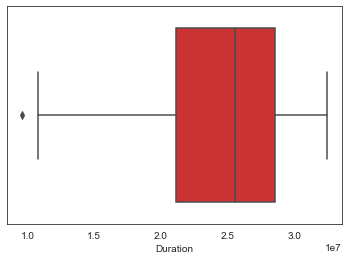

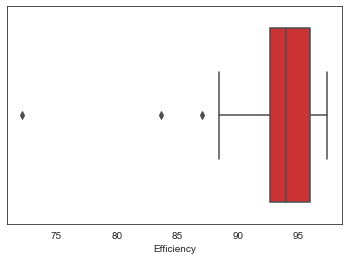

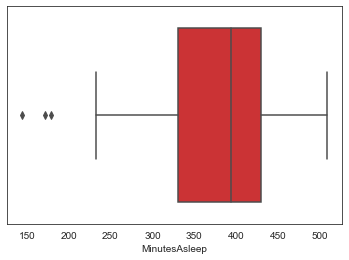

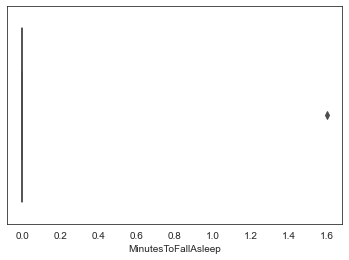

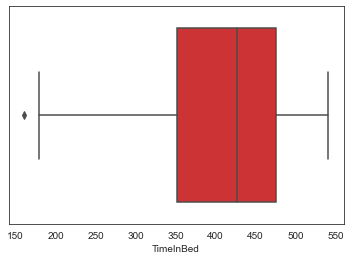

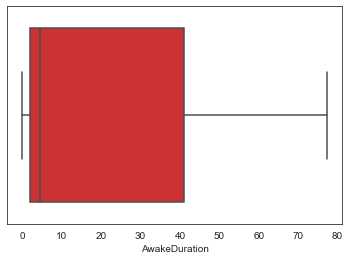

In [15]:
for column in sleepSummary:
    plt.figure()
    sns.boxplot(sleepSummary[column])

# Compare to Actiwatch sleep summary metrics

In [16]:
actSleepStats = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/wa_act_combined.csv')

actSleepStats = actSleepStats[(actSleepStats['interval_type'] == 'SLEEP') | (actSleepStats['interval_type'] == 'REST') ]
actSleepStats['duration'] = actSleepStats['duration'].ffill(limit=1)
actSleepStats = actSleepStats[(actSleepStats['interval_type'] == 'SLEEP')]

actSleepStats['subject'] = actSleepStats['subject_id'].astype(int)

actSleepStats = actSleepStats[['subject', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'total_ac', 'onset_latency', 'efficiency',
       'wake_time', 'percent_wake', 'sleep_time', 'percent_sleep',
       'percent_immobile', 'fragmentation']]

actSleepStats['date'] = actSleepStats['start_date'] + " " + actSleepStats['start_time']
actSleepStats['date'] = pd.to_datetime(actSleepStats['date']).round('D')

actSleepStats.columns = ['subject', 'start_date', 'start_time',
       'end_date', 'end_time', 'TimeInBed', 'total_ac', 'MinutesToFallAsleep', 'Efficiency',
       'AwakeDuration', 'percent_wake', 'MinutesAsleep', 'percent_sleep',
       'percent_immobile', 'fragmentation', 'date']

cols = ['TimeInBed', 'total_ac', 'MinutesToFallAsleep', 'Efficiency', 'AwakeDuration', 'percent_wake', 'MinutesAsleep', 'percent_sleep', 'percent_immobile', 'fragmentation']

actSleepStats[cols] = actSleepStats[cols].apply(pd.to_numeric, errors='coerce')

In [17]:
actSleepStats.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/wa_act_combined.csv')
actSleepStats

,subject,start_date,start_time,end_date,end_time,TimeInBed,total_ac,MinutesToFallAsleep,Efficiency,AwakeDuration,percent_wake,MinutesAsleep,percent_sleep,percent_immobile,fragmentation,date
39,10011,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,552.0,12923.0,5.0,85.02,78.0,14.13,474.0,85.87,89.13,14.57,2019-10-25
40,10011,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,482.0,8935.0,4.0,88.07,46.5,9.65,435.5,90.35,92.95,7.05,2019-10-26
41,10011,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,538.5,6240.0,12.5,89.85,43.0,7.99,495.5,92.01,93.59,18.31,2019-10-27
42,10011,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,340.0,4911.0,8.0,89.96,26.5,7.79,313.5,92.21,92.35,14.79,2019-10-28
43,10011,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,393.0,4410.0,7.0,90.51,30.5,7.76,362.5,92.24,93.26,6.74,2019-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,20184,12/18/2020,7:24:30 PM,12/19/2020,6:08:00 AM,643.5,27140.0,0.0,85.37,89.0,13.83,554.5,86.17,81.66,38.73,2020-12-19
4025,20184,12/19/2020,10:56:00 PM,12/20/2020,6:39:30 AM,463.5,4532.0,13.0,90.25,33.0,7.12,430.5,92.88,94.07,8.87,2020-12-20
4026,20184,12/20/2020,10:01:30 PM,12/21/2020,6:00:00 AM,478.5,5498.0,22.5,88.04,37.0,7.73,441.5,92.27,90.60,27.59,2020-12-21
4027,20184,12/21/2020,10:05:30 PM,12/22/2020,6:09:00 AM,483.5,7124.0,2.5,90.68,41.0,8.48,442.5,91.52,92.76,13.69,2020-12-22


In [18]:
actSleepStatsCleaned = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/actiware_manual_clean/wa_act_combined.csv')

actSleepStatsCleaned = actSleepStatsCleaned[(actSleepStatsCleaned['interval_type'] == 'SLEEP') | (actSleepStatsCleaned['interval_type'] == 'REST') ]
actSleepStatsCleaned['duration'] = actSleepStatsCleaned['duration'].ffill(limit=1)
actSleepStatsCleaned = actSleepStatsCleaned[(actSleepStatsCleaned['interval_type'] == 'SLEEP')]

actSleepStatsCleaned['subject'] = actSleepStatsCleaned['subject_id'].astype(int)

actSleepStatsCleaned = actSleepStatsCleaned[['subject', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'total_ac', 'onset_latency', 'efficiency',
       'wake_time', 'percent_wake', 'sleep_time', 'percent_sleep',
       'percent_immobile', 'fragmentation']]

actSleepStatsCleaned['date'] = actSleepStatsCleaned['start_date'] + " " + actSleepStatsCleaned['start_time']
actSleepStatsCleaned['date'] = pd.to_datetime(actSleepStatsCleaned['date']).round('D')

actSleepStatsCleaned.columns = ['subject', 'start_date', 'start_time',
       'end_date', 'end_time', 'TimeInBed', 'total_ac', 'MinutesToFallAsleep', 'Efficiency',
       'AwakeDuration', 'percent_wake', 'MinutesAsleep', 'percent_sleep',
       'percent_immobile', 'fragmentation', 'date']

cols = ['TimeInBed', 'total_ac', 'MinutesToFallAsleep', 'Efficiency', 'AwakeDuration', 'percent_wake', 'MinutesAsleep', 'percent_sleep', 'percent_immobile', 'fragmentation']

actSleepStatsCleaned[cols] = actSleepStatsCleaned[cols].apply(pd.to_numeric, errors='coerce')

In [19]:
actSleepStatsCleaned

,subject,start_date,start_time,end_date,end_time,TimeInBed,total_ac,MinutesToFallAsleep,Efficiency,AwakeDuration,percent_wake,MinutesAsleep,percent_sleep,percent_immobile,fragmentation,date
39,10011,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,552.0,12923.0,5.0,85.02,78.0,14.13,474.0,85.87,89.13,14.57,2019-10-25
40,10011,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,482.0,8935.0,4.0,88.07,46.5,9.65,435.5,90.35,92.95,7.05,2019-10-26
41,10011,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,538.5,6240.0,12.5,89.85,43.0,7.99,495.5,92.01,93.59,18.31,2019-10-27
42,10011,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,340.0,4911.0,8.0,89.96,26.5,7.79,313.5,92.21,92.35,14.79,2019-10-28
43,10011,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,393.0,4410.0,7.0,90.51,30.5,7.76,362.5,92.24,93.26,6.74,2019-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,20184,12/18/2020,7:24:30 PM,12/19/2020,6:08:00 AM,643.5,27140.0,0.0,85.37,89.0,13.83,554.5,86.17,81.66,38.73,2020-12-19
3869,20184,12/19/2020,10:56:00 PM,12/20/2020,6:39:30 AM,463.5,4532.0,13.0,90.25,33.0,7.12,430.5,92.88,94.07,8.87,2020-12-20
3870,20184,12/20/2020,10:01:30 PM,12/21/2020,6:00:00 AM,478.5,5498.0,22.5,88.04,37.0,7.73,441.5,92.27,90.60,27.59,2020-12-21
3871,20184,12/21/2020,10:05:30 PM,12/22/2020,6:09:00 AM,483.5,7124.0,2.5,90.68,41.0,8.48,442.5,91.52,92.76,13.69,2020-12-22


In [20]:
fitSleepStats.dtypes

TotalMinutesAsleep             object
TotalTimeInBed                 object
subject                         int64
date                   datetime64[ns]
StartTime                      object
Duration                      float64
Efficiency                    float64
MinutesAfterWakeup             object
MinutesAsleep                 float64
MinutesToFallAsleep           float64
TimeInBed                     float64
AwakeCount                     object
AwakeDuration                 float64
RestlessCount                  object
RestlessDuration               object
dtype: object

In [21]:
fitSleepStats = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fitbitSleepStatsGroup.csv', parse_dates=['date'])

In [22]:
fitSleepStats[['subject', 'date']].dtypes

subject             int64
date       datetime64[ns]
dtype: object

In [23]:
actSleepStats[['subject', 'date']].dtypes

subject             int64
date       datetime64[ns]
dtype: object

In [24]:
fitSleepStats.columns

Index(['Unnamed: 0', 'TotalMinutesAsleep', 'TotalTimeInBed', 'subject', 'date',
       'StartTime', 'Duration', 'Efficiency', 'MinutesAfterWakeup',
       'MinutesAsleep', 'MinutesToFallAsleep', 'TimeInBed', 'AwakeCount',
       'AwakeDuration', 'RestlessCount', 'RestlessDuration'],
      dtype='object')

In [25]:
sleepStats2 = actSleepStats.merge(actSleepStatsCleaned, on = ['subject', 'date'], how='outer', suffixes = ['_act', '_cl'])
sleepStats2 = sleepStats2.merge(fitSleepStats, on = ['subject', 'date'], how = 'outer', suffixes = ['', '_fit'])
sleepStats2

,subject,start_date_act,start_time_act,end_date_act,end_time_act,TimeInBed_act,total_ac_act,MinutesToFallAsleep_act,Efficiency_act,AwakeDuration_act,...,Duration,Efficiency,MinutesAfterWakeup,MinutesAsleep,MinutesToFallAsleep,TimeInBed,AwakeCount,AwakeDuration,RestlessCount,RestlessDuration
0,10011,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,552.0,12923.0,5.0,85.02,78.0,...,33360000.0,91.0,0.0,508.0,0.0,556.0,2.0,4.0,8.0,23.0
1,10011,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,482.0,8935.0,4.0,88.07,46.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,538.5,6240.0,12.5,89.85,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10011,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,340.0,4911.0,8.0,89.96,26.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10011,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,393.0,4410.0,7.0,90.51,30.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38940000.0,98.0,NaN,569.0,0.0,649.0,NaN,80.0,NaN,NaN
982,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31980000.0,97.0,NaN,465.0,0.0,533.0,NaN,68.0,NaN,NaN
983,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36000000.0,96.0,NaN,540.0,0.0,600.0,NaN,60.0,NaN,NaN
984,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30420000.0,98.0,NaN,438.0,0.0,507.0,NaN,69.0,NaN,NaN


I had to manually edit the Beiwe subject numbers because I could not figure out how to match them up without their age groups. So I edited them and then now am reuploading the dataset as a new csv.

In [26]:
fitSleepStats['device'] = 'Fitbit'
actSleepStats['device'] = 'Actiwatch 2.0'
actSleepStatsCleaned['device'] = 'Actiwatch 2.0 cleaned'


In [27]:
sleepStats = pd.concat([actSleepStats, fitSleepStats]).sort_values(by = ['subject', 'date'], ignore_index=True).set_index('subject')
sleepStatsCl = pd.concat([actSleepStatsCleaned, fitSleepStats]).sort_values(by = ['subject', 'date'], ignore_index=True).set_index('subject')


In [28]:
sleepStatsCl

,start_date,start_time,end_date,end_time,TimeInBed,total_ac,MinutesToFallAsleep,Efficiency,AwakeDuration,percent_wake,...,device,Unnamed: 0,TotalMinutesAsleep,TotalTimeInBed,StartTime,Duration,MinutesAfterWakeup,AwakeCount,RestlessCount,RestlessDuration
subject,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,468.0,NaN,0.0,93.00,69.0,NaN,...,Fitbit,559.0,NaN,NaN,NaN,28080000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,174.0,NaN,0.0,92.00,14.0,NaN,...,Fitbit,560.0,NaN,NaN,NaN,10440000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,486.0,NaN,0.0,90.00,67.0,NaN,...,Fitbit,561.0,NaN,NaN,NaN,29160000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,460.0,NaN,0.0,91.00,61.0,NaN,...,Fitbit,562.0,NaN,NaN,NaN,27600000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,590.0,NaN,0.0,96.00,117.0,NaN,...,Fitbit,563.0,NaN,NaN,NaN,35400000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,12/18/2020,7:24:30 PM,12/19/2020,6:08:00 AM,643.5,27140.0,0.0,85.37,89.0,13.83,...,Actiwatch 2.0 cleaned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20184,12/19/2020,10:56:00 PM,12/20/2020,6:39:30 AM,463.5,4532.0,13.0,90.25,33.0,7.12,...,Actiwatch 2.0 cleaned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20184,12/20/2020,10:01:30 PM,12/21/2020,6:00:00 AM,478.5,5498.0,22.5,88.04,37.0,7.73,...,Actiwatch 2.0 cleaned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
sleepStats.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStats.csv')
sleepStatsCl.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStatsCl.csv')

In [30]:
sleepStats2Sum = sleepStats2.groupby(['subject']).mean()
sleepStats2Sum

,TimeInBed_act,total_ac_act,MinutesToFallAsleep_act,Efficiency_act,AwakeDuration_act,percent_wake_act,MinutesAsleep_act,percent_sleep_act,percent_immobile_act,fragmentation_act,...,Duration,Efficiency,MinutesAfterWakeup,MinutesAsleep,MinutesToFallAsleep,TimeInBed,AwakeCount,AwakeDuration,RestlessCount,RestlessDuration
subject,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.434909e+07,92.545455,NaN,352.454545,0.0,405.818182,NaN,53.363636,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.745000e+07,88.500000,NaN,400.000000,0.0,457.500000,NaN,57.500000,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.231818e+07,97.363636,NaN,477.909091,0.0,538.636364,NaN,60.727273,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.822667e+07,96.555556,NaN,422.777778,0.0,470.444444,NaN,47.666667,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.227077e+07,94.846154,NaN,470.461538,0.0,537.846154,NaN,67.384615,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20178,470.166667,8092.750000,15.875000,88.425833,38.458333,8.073333,431.708333,91.926667,91.634167,16.139167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20180,516.863636,8618.272727,48.454545,83.569091,41.045455,7.536364,475.818182,92.463636,91.537273,13.986364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20181,523.818182,6994.909091,43.500000,84.483636,42.454545,7.732727,481.363636,92.267273,87.267273,25.282727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plots

In [31]:
sleepStats = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStats.csv')
sleepStatsCl = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStatsCl.csv')


dfmain = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/df_main.csv')

df = pd.merge(dfmain, sleepStats, on = 'subject')
dfCl = pd.merge(dfmain, sleepStatsCl, on = 'subject')
sleepStats2Sum = pd.merge(dfmain, sleepStats2Sum, on = 'subject')

In [32]:
exclude = ['10023', '10076', '20182', '20184', '20176', '10151']
sleepStats = sleepStats[~sleepStats.index.isin(exclude)]
sleepStatsCl = sleepStatsCl[~sleepStatsCl.index.isin(exclude)]

df = df[~df['subject'].isin(exclude)]
dfCl = dfCl[~dfCl['subject'].isin(exclude)]
sleepStats2 = sleepStats2[~sleepStats2['subject'].isin(exclude)]

In [33]:
sleepStats2

,subject,start_date_act,start_time_act,end_date_act,end_time_act,TimeInBed_act,total_ac_act,MinutesToFallAsleep_act,Efficiency_act,AwakeDuration_act,...,Duration,Efficiency,MinutesAfterWakeup,MinutesAsleep,MinutesToFallAsleep,TimeInBed,AwakeCount,AwakeDuration,RestlessCount,RestlessDuration
0,10011,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,552.0,12923.0,5.0,85.02,78.0,...,33360000.0,91.0,0.0,508.0,0.0,556.0,2.0,4.0,8.0,23.0
1,10011,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,482.0,8935.0,4.0,88.07,46.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,538.5,6240.0,12.5,89.85,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10011,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,340.0,4911.0,8.0,89.96,26.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10011,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,393.0,4410.0,7.0,90.51,30.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38940000.0,98.0,NaN,569.0,0.0,649.0,NaN,80.0,NaN,NaN
982,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31980000.0,97.0,NaN,465.0,0.0,533.0,NaN,68.0,NaN,NaN
983,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36000000.0,96.0,NaN,540.0,0.0,600.0,NaN,60.0,NaN,NaN
984,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30420000.0,98.0,NaN,438.0,0.0,507.0,NaN,69.0,NaN,NaN


### Mean sleep summary stats correlations

In [34]:
sleepStats2[sleepStats2.columns[sleepStats2.columns.str.contains('_fit|_act')].to_list()].corr(method='spearman')[sleepStats2.columns[sleepStats2.columns.str.contains('_fit')][0:5].to_list()].sort_index().sort_index(axis=1)


""
AwakeDuration_act
Efficiency_act
MinutesAsleep_act
MinutesToFallAsleep_act
TimeInBed_act
fragmentation_act
percent_immobile_act
percent_sleep_act
percent_wake_act
total_ac_act


In [35]:
sleepStats2[sleepStats2.columns[sleepStats2.columns.str.contains('_fit|_cl')].to_list()].corr(method='spearman')[sleepStats2.columns[sleepStats2.columns.str.contains('_fit')].to_list()][0:5].sort_index().sort_index(axis=1)


""
AwakeDuration_cl
Efficiency_cl
MinutesToFallAsleep_cl
TimeInBed_cl
total_ac_cl


0.08636503953082074


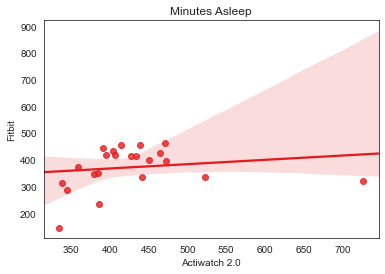

In [36]:
ax = sns.regplot(x = 'MinutesAsleep_act', y = 'MinutesAsleep', data = sleepStats2Sum[sleepStats2Sum['subject'] < 20000])
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes Asleep')
print(sleepStats2Sum['MinutesAsleep_act'].corr(sleepStats2Sum['MinutesAsleep']))

0.4938862465536712


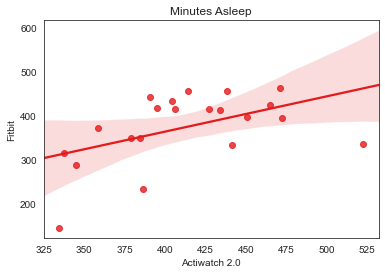

In [37]:
ax = sns.regplot(x = 'MinutesAsleep_act', y = 'MinutesAsleep', data = sleepStats2Sum[(sleepStats2Sum['subject'] < 20000) & (sleepStats2Sum['MinutesAsleep_act'] < 650)])
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes Asleep')

new = sleepStats2Sum[(sleepStats2Sum['subject'] < 20000) & (sleepStats2Sum['MinutesAsleep_act'] < 650)]
print(new['MinutesAsleep_act'].corr(new['MinutesAsleep']))

0.6612573848523134


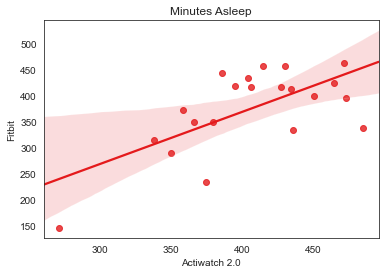

In [38]:
ax = sns.regplot(x = 'MinutesAsleep_cl', y = 'MinutesAsleep', data=sleepStats2Sum[sleepStats2Sum['subject'] < 20000])
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes Asleep')

new = sleepStats2Sum[(sleepStats2Sum['subject'] < 20000)]
print(new['MinutesAsleep_cl'].corr(new['MinutesAsleep']))

Text(0.5, 1.0, 'Time In Bed')

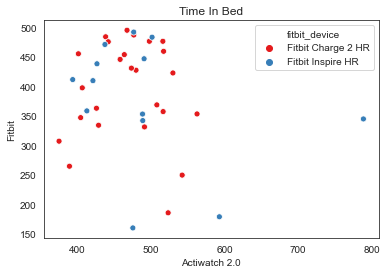

In [39]:
ax = sns.scatterplot(x = 'TimeInBed_act', y = 'TimeInBed', hue='fitbit_device', data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Time In Bed')


Text(0.5, 1.0, 'Time In Bed')

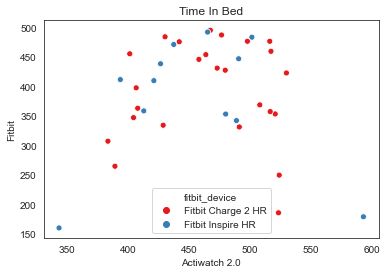

In [40]:
ax = sns.scatterplot(x = 'TimeInBed_cl', y = 'TimeInBed', hue='fitbit_device', data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Time In Bed')


In [41]:
ax = sns.scatterplot(x = 'AwakeDuration_act', y = 'AwakeDuration_fit', hue=sleepStats2Sum.index.get_level_values(1).to_list(), data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes Awake')


IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
ax = sns.scatterplot(x = 'MinutesToFallAsleep_act', y = 'MinutesToFallAsleep_fit', hue=sleepStats2Sum.index.get_level_values(1).to_list(), data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes To Fall Asleep')


In [ ]:
ax = sns.scatterplot(x = 'Efficiency_act', y = 'Efficiency_fit', hue=sleepStats2Sum.index.get_level_values(1).to_list(), data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Sleep Efficiency')


## Within-subject sleep summary metric correlations

In [ ]:
df[['subject','date', 'MinutesAsleep_act', 'MinutesAsleep_fit']][0:10]

In [ ]:
df[['subject', 'date', 'fitbit_device', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['subject']).corr(method='spearman')[1::2]

In [ ]:
df[['subject', 'date', 'fitbit_device', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['subject']).corr(method='spearman')[1::2].describe()

In [ ]:
df[['subject', 'date', 'fitbit_device', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['subject']).corr(method='spearman')[1::2].plot(y='MinutesAsleep_act')
plt.xlabel('Subject')
plt.ylabel('Minutes Asleep Correlation')
plt.xticks([], [])
plt.legend(['R-value'])

In [ ]:
df[['subject', 'date', 'fitbit_device', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['subject']).corr(method='spearman')[1::2].boxplot(column='MinutesAsleep_act')

In [ ]:
df[['subject','date', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['subject']).corr()[1::2].describe()


### Minutes Asleep Correlation within Subjects and by Fitbit Device

In [ ]:
df[['subject','date', 'fitbit_device', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['fitbit_device', 'subject']).corr()[1::2].groupby('fitbit_device').describe()


In [ ]:
df[['subject','date', 'TimeInBed_act', 'TimeInBed_fit']].groupby(['subject']).corr()[1::2].describe()


In [ ]:
df[['subject','date', 'AwakeDuration_act', 'AwakeDuration_fit']].groupby(['subject']).corr()[1::2].describe()


In [ ]:
df[['subject','date', 'MinutesToFallAsleep_act', 'MinutesToFallAsleep_fit']].groupby(['subject']).corr()[1::2].describe()


In [ ]:
df[['subject','date', 'Efficiency_act', 'Efficiency_fit']].groupby(['subject']).corr()[1::2].describe()


In [ ]:
pg.plot_rm_corr(data=df, x='MinutesAsleep_act', y='MinutesAsleep_fit', subject='subject')
pg.rm_corr(data=df, x='MinutesAsleep_act', y='MinutesAsleep_fit', subject='subject')

In [ ]:
pg.plot_rm_corr(data=df, x='TimeInBed_act', y='TimeInBed_fit', subject='subject')
pg.rm_corr(data=df, x='TimeInBed_act', y='TimeInBed_fit', subject='subject')


In [ ]:
pg.plot_rm_corr(data=df, x='AwakeDuration_act', y='AwakeDuration_fit', subject='subject')
pg.rm_corr(data=df, x='AwakeDuration_act', y='AwakeDuration_fit', subject='subject')


In [ ]:
pg.plot_rm_corr(data=df, x='MinutesToFallAsleep_act', y='MinutesToFallAsleep_fit', subject='subject')
pg.rm_corr(data=df, x='MinutesToFallAsleep_act', y='MinutesToFallAsleep_fit', subject='subject')


In [ ]:
pg.plot_rm_corr(data=df, x='Efficiency_act', y='Efficiency_fit', subject='subject')
pg.rm_corr(data=df, x='Efficiency_act', y='Efficiency_fit', subject='subject')